In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from os.path import join as opj
from nilearn import image, plotting

/home/javi/Documentos/software/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
# Atlas
atlas_img = image.load_img("../../data/atlases/shen_2mm_268_parcellation.nii.gz")
shen_rsns = pd.read_csv("../../data/atlases/shen_268_parcellation_networklabels.csv")

rsn_ids = np.sort(shen_rsns.Network.unique())

# Order according to network id in increasing order
shen_rsns = shen_rsns.sort_values("Network")
shen_rsns.head()

network_regions = dict()
for ii in rsn_ids:
    network_regions[ii] = shen_rsns[shen_rsns.Network == ii]['Node'].to_list()
#print(network_regions)

network_ids = dict()
for ii, net_id in zip(rsn_ids, ['mf', 'fp', 'dm','sc', 'mt', 'v1', 'v2', 'va']):
    network_ids[ii] = net_id
#print(network_ids)

network_labels = dict()
for ii, net_label in zip(rsn_ids, 
                      ['medial-frontal', 'frontoparietal', 'default-mode','subcortical-cerebellum',
                       'motor', 'visual-1', 'visual-2', 'visual-association']):
    network_labels[ii] = net_label
#print(network_labels)

# Add colours to each network (R, G, B)
rsn_colors = [[128,0,128], [0,255,255], [255,215,0], [255,69,0],
              [0,0,128], [255,0,255], [0,255,0], [128,0,0]
             ]

network_colors = dict()
for ii, color in zip(rsn_ids, rsn_colors):
    network_colors[ii] = color
#print(network_colors)

# place everything in the same dictionary
network_info = dict()
for ii in rsn_ids:
    net_dict = dict()
    
    net_dict['regions'] = network_regions[ii]
    net_dict['id'] = network_ids[ii]
    net_dict['label'] = network_labels[ii]
    net_dict['color'] = network_colors[ii]
    net_dict['start'] = 0
    net_dict['end'] = len(network_regions[ii])*100 -1
    
    network_info[ii] = net_dict
    
print(network_info)

{1: {'regions': [165, 53, 52, 148, 194, 149, 192, 162, 190, 186, 185, 150, 183, 151, 153, 187, 219, 54, 156, 57, 16, 145, 12, 140, 10, 56, 64, 65, 137], 'id': 'mf', 'label': 'medial-frontal', 'color': [128, 0, 128], 'start': 0, 'end': 2899}, 2: {'regions': [154, 111, 112, 70, 116, 55, 139, 142, 147, 143, 47, 48, 1, 164, 247, 246, 4, 242, 7, 8, 9, 157, 17, 19, 14, 22, 182, 184, 31, 21, 193, 196, 30, 199], 'id': 'fp', 'label': 'frontoparietal', 'color': [0, 255, 255], 'start': 0, 'end': 3399}, 3: {'regions': [141, 225, 138, 239, 223, 115, 203, 222, 86, 96, 90, 227, 85, 134, 50, 6, 3, 5, 13, 49], 'id': 'dm', 'label': 'default-mode', 'color': [255, 215, 0], 'start': 0, 'end': 1999}, 4: {'regions': [268, 146, 236, 144, 237, 238, 244, 245, 136, 135, 267, 133, 131, 130, 129, 128, 243, 234, 233, 152, 29, 36, 28, 178, 217, 169, 20, 220, 221, 127, 18, 224, 226, 11, 229, 230, 231, 155, 232, 44, 15, 126, 132, 124, 99, 253, 254, 255, 125, 94, 93, 256, 91, 257, 258, 88, 259, 260, 261, 262, 83, 263, 

let's use the above created object to create a new object for each node, with their colors, start end, etc. This will be helpful when creating the list of links

In [3]:
nodes_info = dict()
for rsn_id in network_info:
    network_dict = network_info[rsn_id]
    
    start = 0
    end = 99
    for ii, region_id in enumerate(network_dict['regions']):
        parent_id = network_dict['id']
        reg_id = network_dict['id'] + "_" + str(ii+1)
        reg_label = network_dict['id'] + "-" + str(ii+1)
        color_id = network_dict['id'] + "_color_" + str(ii+1)
        nodes_info[region_id] = {'id': reg_id, 
                                 'label': reg_label, 
                                 'start': start, 
                                 'end': end, 
                                 'color_id': color_id, 
                                 'color_rgb': network_dict['color'], 
                                 'parent_id': parent_id}
        start += 100
        end += 100

print(nodes_info)

{165: {'id': 'mf_1', 'label': 'mf-1', 'start': 0, 'end': 99, 'color_id': 'mf_color_1', 'color_rgb': [128, 0, 128], 'parent_id': 'mf'}, 53: {'id': 'mf_2', 'label': 'mf-2', 'start': 100, 'end': 199, 'color_id': 'mf_color_2', 'color_rgb': [128, 0, 128], 'parent_id': 'mf'}, 52: {'id': 'mf_3', 'label': 'mf-3', 'start': 200, 'end': 299, 'color_id': 'mf_color_3', 'color_rgb': [128, 0, 128], 'parent_id': 'mf'}, 148: {'id': 'mf_4', 'label': 'mf-4', 'start': 300, 'end': 399, 'color_id': 'mf_color_4', 'color_rgb': [128, 0, 128], 'parent_id': 'mf'}, 194: {'id': 'mf_5', 'label': 'mf-5', 'start': 400, 'end': 499, 'color_id': 'mf_color_5', 'color_rgb': [128, 0, 128], 'parent_id': 'mf'}, 149: {'id': 'mf_6', 'label': 'mf-6', 'start': 500, 'end': 599, 'color_id': 'mf_color_6', 'color_rgb': [128, 0, 128], 'parent_id': 'mf'}, 192: {'id': 'mf_7', 'label': 'mf-7', 'start': 600, 'end': 699, 'color_id': 'mf_color_7', 'color_rgb': [128, 0, 128], 'parent_id': 'mf'}, 162: {'id': 'mf_8', 'label': 'mf-8', 'start':

# Create nodes in ideogram

This will contain the following elements

- Parcellation, que se define como charotype (chr), con una longitud = 100*n, donde n es el número de regiones/voxels en esa parcellation
- Luego una banda, donde cada una de estas regions tiene una longitud de 100 y un nombre.
- Un color a cada una de estas. Esto es fácil

With the above information, we can easilty create our segments file

In [4]:
import os
if os.path.exists("../../plots/circos_gsr") is False:
    os.mkdir("../../plots/circos_gsr")
    
if os.path.exists("../../plots/circos_gsr/data") is False:
    os.mkdir("../../plots/circos_gsr/data")

In [5]:
# Define the segments
with open("../../plots/circos_gsr/segments_shen.txt", "w") as f:
    for net_key, net_dict in network_info.items():
        chr_line = "chr - %s %s %d %d black\n" % (net_dict['id'], net_dict['label'], net_dict['start'], net_dict['end'])
        f.writelines(chr_line)
        
        regions = net_dict['regions']
        # write each node
        for reg_id in regions:
            reg_dict = nodes_info[reg_id]
            band_line = "band %s %s %s %d %d %s\n" % (reg_dict['parent_id'], 
                                                      reg_dict['id'], 
                                                      reg_dict['label'], 
                                                      reg_dict['start'], 
                                                      reg_dict['end'], 
                                                      reg_dict['color_id'])
            f.writelines(band_line)
        

In [6]:
# Specify the segments labels in a separate file
with open("../../plots/circos_gsr/segments_shen_labels.txt", "w") as f:
     for node_key, node_dict in nodes_info.items():
        color_id = node_dict['color_id']
        rgb_colors = node_dict['color_rgb']

        label_line = "%s %d %d %s\n" % (node_dict['parent_id'], 
                                        node_dict['start'],
                                        node_dict['end'],
                                        node_dict['label'])
        f.writelines(label_line)
    

In [7]:
# Create a file specifying the colors
with open("../../plots/circos_gsr/shen_colors.conf", "w") as f:
     for node_key, node_dict in nodes_info.items():
            color_id = node_dict['color_id']
            rgb_colors = node_dict['color_rgb']
            
            color_line = "%s = %d,%d,%d\n" % (color_id, rgb_colors[0], rgb_colors[1], rgb_colors[2])
            f.writelines(color_line)

# Heatmap with the average second-level activations in this atlas, filtered

In [8]:
mask_img = "../../data/masks/grey_mask_motion_035.nii.gz"

In [9]:
def load_activation_results(task_id, contrast, mask_img, height_control="fdr", alpha = 0.05, cluster_threshold = 50):
    
    from nilearn.glm import threshold_stats_img
    
    base_dir = opj("../../results/second-level/node_gsr/task-%s" % task_id, contrast)
    
    res_second = dict()
    for name in ["stat", "z_score", "p_value"]:
        res_second[name] = image.load_img(opj(base_dir, "%s.nii.gz" % name))
        
    z_thr, thr = threshold_stats_img(res_second["z_score"],  
                                     mask_img = mask_img,
                                     height_control = height_control,
                                     alpha = alpha,
                                     cluster_threshold = cluster_threshold)
    res_second['z_score_thr'] = z_thr
    
    res_second['stat_thr'] = image.math_img("img1*(abs(img2) > %f)" % thr, 
                                            img1 = res_second["stat"], 
                                            img2 = res_second["z_score"])    
    return res_second

In [10]:
from nilearn.input_data import NiftiLabelsMasker
from sklearn.preprocessing import maxabs_scale

In [11]:
def generate_heat_map_file(task_id, contrast, mask_img, atlas_img):
    
    res_second = load_activation_results(task_id = task_id, 
                                        contrast = contrast,
                                        mask_img=mask_img)

    nifti_label = NiftiLabelsMasker(labels_img = atlas_img)
    stats_shen = np.squeeze(nifti_label.fit_transform(res_second['stat_thr']))
    stats_shen = list(maxabs_scale(stats_shen))

    filename = "../../plots/circos_gsr/data/heatmap_%s.txt" % task_id
    with open(filename, "w") as f:
         for node_key, node_dict in nodes_info.items():
                parent_id = node_dict['parent_id']
                start = node_dict['start']
                end = node_dict['end']
                value = stats_shen[node_key-1]

                hm_line = "%s %d %d %.5f\n" % (parent_id, start, end, value)
                f.writelines(hm_line)

In [12]:
# Heat map for stroop
generate_heat_map_file(task_id = "stroop", 
                       contrast = "Incongruent-Congruent",
                       mask_img=mask_img, 
                       atlas_img = atlas_img)

In [13]:
# Heatmap for msit
generate_heat_map_file(task_id = "msit", 
                       contrast = "Incongruent-Congruent",
                       mask_img=mask_img, 
                       atlas_img = atlas_img)

# Histograms with the significant edges 

In [15]:
def load_edge_results(task_id, contrast, method="holm", alpha = 0.05):
    from scipy.stats import norm
    from scipy.spatial.distance import squareform
    from statsmodels.stats.multitest import multipletests
    base_dir = opj("../../results/second-level/edge_gsr/shen/task-%s" % task_id, contrast)
    
    res_second = dict()
    for name in ["stat", "z_score"]:
        res_second[name] = np.squeeze(image.load_img(opj(base_dir, "%s.nii.gz" % name)).get_fdata())
    
    p_values = norm.sf(abs(squareform(res_second['z_score'], checks=False)))*2 #two-sided
    res_second['p_values'] = squareform(p_values)
    is_sig,_,_,_ = multipletests(p_values, method = method, alpha = alpha)

    res_second['is_significant'] = squareform(is_sig)
    res_second['stat_corrected'] = squareform(is_sig)*res_second["stat"]
    
    return res_second

In [16]:
#stroop_second = load_edge_results(task_id = "stroop", contrast = "Incongruent-Congruent", method="holm")

In [17]:
def generate_histo_pv_file(task_id, contrast, method = "holm", alpha = 0.05):
    
    res_second = load_edge_results(task_id = task_id, 
                                   contrast = contrast,
                                   method = method, 
                                   alpha = alpha)

    pvals = list(np.sum(res_second['is_significant'], axis = 1))
    filename ="../../plots/circos_gsr/data/histo_%s.txt" % task_id
    with open(filename, "w") as f:
         for node_key, node_dict in nodes_info.items():
                parent_id = node_dict['parent_id']
                start = node_dict['start']
                end = node_dict['end']
                value = pvals[node_key-1]

                hm_line = "%s %d %d %d\n" % (parent_id, start, end, value)
                f.writelines(hm_line)

In [18]:
generate_histo_pv_file(task_id = "stroop", contrast = "Incongruent-Congruent", method="holm")

In [19]:
generate_histo_pv_file(task_id = "msit", contrast = "Incongruent-Congruent", method="holm")

# LINKS

In [20]:
def generate_link_file(task_id, contrast, method = "holm", alpha = 0.05):
    from scipy.spatial.distance import squareform

    res_second = load_edge_results(task_id = task_id, contrast = contrast,
                                  method = method, alpha = alpha)
    stats_corrected = squareform(maxabs_scale(squareform(res_second['stat_corrected'], checks=False)))
    is_sig = res_second['is_significant'].copy()
    is_sig[np.tril_indices_from(is_sig)] = False

    source_ixs, target_ixs = np.where(is_sig)
    filename ="../../plots/circos_gsr/data/links_%s.txt" % task_id
    with open(filename, "w") as f:
        for six, tix in zip(source_ixs, target_ixs):
            source_reg = nodes_info[six + 1] # Nodes start from 1 to 268
            target_reg = nodes_info[tix + 1]
            score = stats_corrected[six, tix]
            if score > 0:
                link_type = 1
            else:
                link_type = 0
            link_line = "%s %d %d %s %d %d type=%s,score=%.5f\n" % (source_reg['parent_id'], source_reg['start'], source_reg['end'],
                                                                     target_reg['parent_id'], target_reg['start'], target_reg['end'],
                                                                     link_type, abs(score))
            f.writelines(link_line)

In [21]:
generate_link_file(task_id = "stroop", contrast = "Incongruent-Congruent", method="holm")
generate_link_file(task_id = "msit", contrast = "Incongruent-Congruent", method="holm")

# Lastly, plot each network with its corresponding colour

In [22]:
from matplotlib import colors

In [23]:
shen_rsn_img_4d = []
for ii in rsn_ids:
    node_ixs = shen_rsns[shen_rsns.Network == ii]["Node"]
    temp = np.zeros_like(atlas_img.get_fdata())
    for nix in node_ixs:
        temp[atlas_img.get_fdata()==nix]=1
    shen_rsn_img_4d.append(image.new_img_like(atlas_img, temp))
shen_rsn_img_4d = image.concat_imgs(shen_rsn_img_4d)

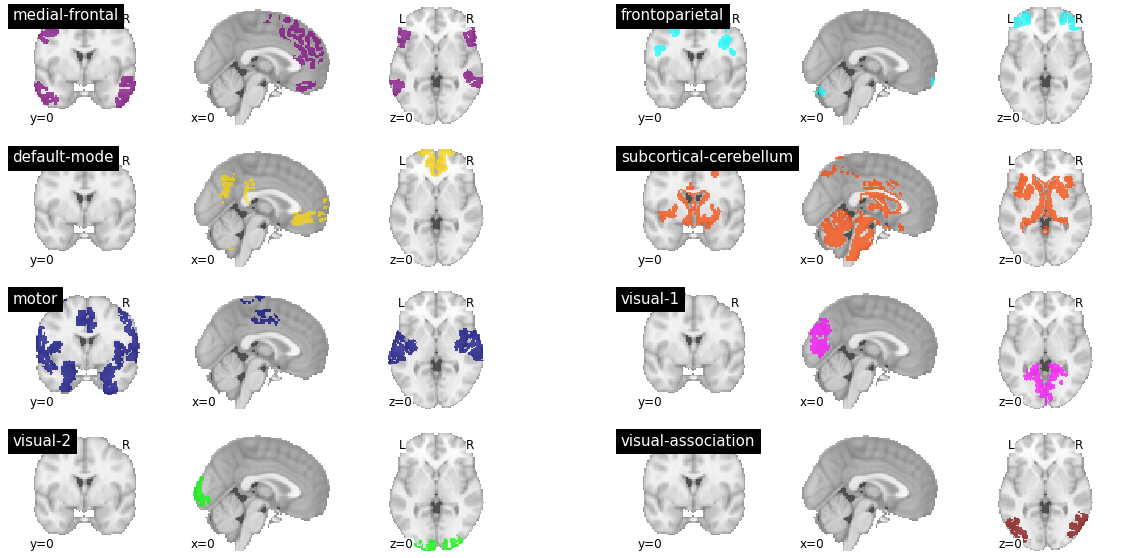

In [31]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 10))
axs = axs.flatten()
for ii, label in zip(range(shen_rsn_img_4d.shape[3]), list(network_labels.values())):
    plotting.plot_roi(image.index_img(shen_rsn_img_4d, ii), 
                      axes=axs[ii], title = label,     
                      draw_cross=False,
                      cut_coords = (0,0,0), 
                      cmap = colors.ListedColormap([col/255 for col in rsn_colors[ii]]))

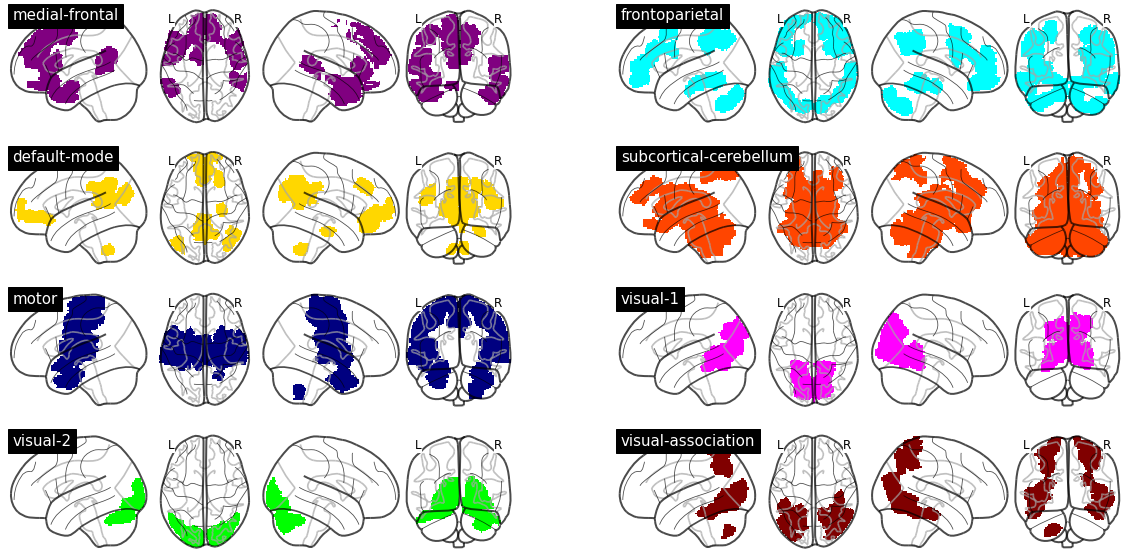

In [34]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 10))
axs = axs.flatten()
for ii, label in zip(range(shen_rsn_img_4d.shape[3]), list(network_labels.values())):
    plotting.plot_glass_brain(image.index_img(shen_rsn_img_4d, ii), axes=axs[ii], 
                              title = label, display_mode="lzry",
                              cmap = colors.ListedColormap([col/255 for col in rsn_colors[ii]]))
plt.savefig("../../plots/connectivity-circos/networks.png", dpi=300)
plt.savefig("../../plots/connectivity-circos/networks.svg", dpi=300)